In [105]:
import numpy as np
import matplotlib.pyplot as plt
import bisect
import time
import array


class cLineInfo:
    def __init__(self,y,index,isright):
        self.y = y
        self.index = index
        self.isright = isright
        
class SN:
    def __init__(self,N,M):
        self.N = N
        self.M = M
        self.line_info = [[[cLineInfo(0,i,True),cLineInfo(1,i+N,True)] for _ in range(M)] for i in range(N)]
        self.stack_leg = [[], N]
        self.stack_circle = [[], N]
        self.leg = [0 for i in range(2*N*8)]
        self.cn = N
        self.map = [[i+N for i in range(N)] + [i for i in range(N)] for _ in range(M+1)]
        
        
    # ============  virsualization functions:  =====================
    def fn_virsualization(self):
         
        m = self.N
        for k in range(0,m):
            plt.plot((k,k),(-0.5,self.M+1.5),'y--')     
              
        for my in range(self.M + 1):
            tmap = self.map[my]
            v_finished = [0 for _ in range(2*m)]
            for k in range(0,2*m):
                if v_finished[k]==0:
                    ind1 = k
                    ind2 = tmap[k]
                    if ind1<=m-1:
                        p1_x = ind1
                        p1_y = self.M - my + 1
                    else:
                        p1_x = ind1 - m
                        p1_y = self.M - my              
                    if ind2<=m-1:
                        p2_x = ind2
                        p2_y = self.M - my + 1
                    else:
                        p2_x = ind2 - m
                        p2_y = self.M - my           
                    v_finished[ind1] = 1
                    v_finished[ind2] = 1
                if p1_y==self.M - my and p2_y==self.M - my:
                    self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True) 
                elif p1_y==self.M - my + 1 and p2_y==self.M - my + 1:
                    self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,False)
                else:
                    self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True)
        plt.show()
        
    
    def fn_virsualization_leg(self):
        map = self.map
        m = (len(map) - 1)//2     
        for k in range(1,m+1):
            plt.plot((k,k),(-0.5,1.5),'y--')  
        for k in range(len(self.dis1)):
            pipe = self.dis1[k][0]
            y = 1 - self.dis1[k][1]
            if pipe<=self.M-2:
                plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.2)
            else:
                plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.2)
                plt.plot([0.5,1],[y,y],color='r',linewidth=0.2)
        
        plt.show()
    
    def fn_virsualization_leg2(self):
        
        for k in range(1,self.M+1):
            plt.plot((k,k),(-0.5,1.5),'y--')  
        for x in self.leg:
            # print(x[0])
            if x:
                pipe = x[0]
                y = 1 - x[1]
                if pipe<=self.M-2:
                    plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.2)
                else:
                    plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.2)
                    plt.plot([0.5,1],[y,y],color='r',linewidth=0.2)
        
        plt.show()
        
        
    def fn_virsualization_leg(self):
        for k in range(0,self.N):
            plt.plot((k,k),(-0.5,self.M + 0.5),'y--')   
        for my in range(self.M):
            for pipe in range(self.N):
                for info in self.line_info[pipe][my]:
                    isright = info.isright        
                    x1 = pipe
                    y1 = - info.y + self.M - my
                    if isright:
                        x2 = x1 + 1
                        y2 = y1
                    else:
                        x2 = x2 - 1
                        y2 = y1
                    if info.index<=2*self.N - 1:
                        plt.plot(x1,y1,'r*')
                    else:
                        plt.plot((x1,x2),(y1,y2),'r*-')
                        print([x1,x2,y1,y2])
                        
        plt.show()
            
                    
                    
                
    
                
    @staticmethod
    def fn_plot2(x1,y1,x2,y2,A,is_up):
        
        if y1!=y2:
            plt.plot((x1,x2),(y1,y2),color='r')     
        elif (is_up):
            vx = np.linspace(x1,x2,500)
            vy = y1 + 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
        else: 
            vx = np.linspace(x1,x2,500)
            vy = y1 - 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
        
        
    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            # self.leg.append([])
            self.leg.append([[0,0],[0,0],[0,0],[0,0],[0,0]])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg

    
    def fn_stack_leg_push(self, index):
        self.stack_leg[0].append(index)
        
        
    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
            self.circle.append([])
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle
    
    
    def fn_stack_circle_push(self,index):
        self.stack_circle[0].append(index)
        
        
    def fn_find_nearest(self,line,m,y):
        index = 1
        while self.line_info[line][m][index].y < y:
            index = index + 1    
        up_ind = self.line_info[line][m][index-1].index
        down_ind = self.line_info[line][m][index].index
        return up_ind, down_ind, index
    
    
    def fn_insert_line_info(self,line,m,index,y,index_leg,isright):
        self.line_info[line][m].insert(index,cLineInfo(y,index_leg,isright))
        return True
    
    def fn_lieb_add(self, index, p1, p2):
        t1 = self.map[index][p1]
        t2 = self.map[index][p2]
        if not t1 == p2:
            self.map[index][t1] = t2
            self.map[index][t2] = t1
            self.map[index][p1] = p2
            self.map[index][p2] = p1
            
            
        

3
7
1
[4, 5, 6, 7, 0, 1, 2, 3]
[4, 5, 3, 2, 0, 1, 7, 6]
[4, 6, 3, 2, 0, 7, 1, 5]


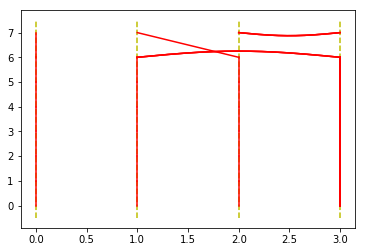

[3, 4, 0.5999999999999996, 0.5999999999999996]


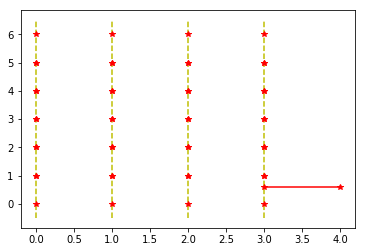

In [106]:
sn = SN(4,6)
sn.line_info[2][5][1].y
[up, down, ind] = sn.fn_find_nearest(3,5,0.6)
print(up)
print(down)
print(ind)
sn.fn_insert_line_info(3,5,ind,0.4,888,True)
sn.line_info[3][5][2].index
print(sn.map[0])
sn.fn_lieb_add(0,2,3)
print(sn.map[0])
sn.fn_lieb_add(0,7,5)
print(sn.map[0])
sn.fn_virsualization()
sn.fn_virsualization_leg()

In [102]:
len(sn.line_info[3][5])

3

In [11]:
tv = [1,2,3]
tv.insert(-8,8)
tv

[8, 1, 2, 3]

In [79]:
sn.map[0]

[4, 5, 3, 2, 0, 1, 7, 6]

In [80]:
sn.map[1]

[4, 5, 6, 7, 0, 1, 2, 3]